In [1]:
import pandas as pd

Realizando a leitura da nossa primeira base de dados para a análise do perfil da nossa clientela de acordo, com as compras que realizaram.

In [2]:
#importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/estatistica-r-frequencias-medidas/refs/heads/main/dados/vendas_ecommerce.csv'
#lendo os dados
df = pd.read_csv(url)

In [3]:
#visualizando as primeiras linhas de df
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


In [4]:
#verificando a quantidade de linhas e colunas do df
df.shape

(200000, 10)

In [5]:
#verificar informações mais detalhadas do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_compra          200000 non-null  object 
 1   sexo_biologico     200000 non-null  object 
 2   idade_cliente      200000 non-null  int64  
 3   regiao_cliente     200000 non-null  object 
 4   categoria_produto  200000 non-null  object 
 5   preco_unitario     200000 non-null  float64
 6   quantidade         200000 non-null  int64  
 7   total_compra       200000 non-null  float64
 8   tempo_entrega      200000 non-null  int64  
 9   avaliacao          200000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.3+ MB


Iremos realizar uma análise simples, investigando uma variável **qualitativa nominal** como, por exemplo, a quantidade de vendas por categoria

In [6]:
#visualizando a coluna de categoria
df['categoria_produto']

0              Ferramentas e Construção
1                   Alimentos e Bebidas
2                           Eletrônicos
3                           Eletrônicos
4                Papelaria e Escritório
                      ...              
199995                      Eletrônicos
199996                      Eletrônicos
199997    Roupas, Calçados e Acessórios
199998              Alimentos e Bebidas
199999       Beleza e Cuidados Pessoais
Name: categoria_produto, Length: 200000, dtype: object

In [7]:
#utilizando a função unique() para mostrar apenas uma categoria de produto por vez
df['categoria_produto'].unique()

array(['Ferramentas e Construção', 'Alimentos e Bebidas', 'Eletrônicos',
       'Papelaria e Escritório', 'Beleza e Cuidados Pessoais',
       'Casa e Mobílias', 'Roupas, Calçados e Acessórios', 'Livros',
       'Brinquedos', 'Esporte e Lazer'], dtype=object)

In [11]:
#verificar a quantidade de vendas por categoria
df['categoria_produto'].value_counts()

categoria_produto
Eletrônicos                      36060
Roupas, Calçados e Acessórios    27917
Casa e Mobílias                  26015
Beleza e Cuidados Pessoais       22026
Esporte e Lazer                  19939
Alimentos e Bebidas              18022
Papelaria e Escritório           13936
Livros                           13790
Ferramentas e Construção         12063
Brinquedos                       10232
Name: count, dtype: int64

In [12]:
#para plotar devemos tornar a coluna em DataFrame
produtos = df['categoria_produto'].value_counts().reset_index()
produtos

,categoria_produto,count
0,Eletrônicos,36060
1,"Roupas, Calçados e Acessórios",27917
2,Casa e Mobílias,26015
3,Beleza e Cuidados Pessoais,22026
4,Esporte e Lazer,19939
5,Alimentos e Bebidas,18022
6,Papelaria e Escritório,13936
7,Livros,13790
8,Ferramentas e Construção,12063
9,Brinquedos,10232


In [13]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

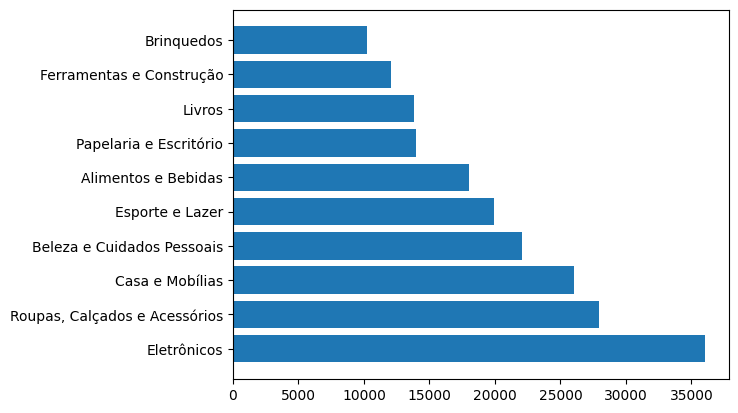

In [15]:
#plotando gráfico em barras na horizontal
plt.barh(produtos['categoria_produto'], produtos['count'])
plt.show

### **Manipulando dados qualitativos ordinais**

In [17]:
#ordenando os dados
sorted(df['avaliacao'].unique())

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

In [22]:
#criando uma coluna categórica
df['avaliacao indicador'] = pd.Categorical(
    df['avaliacao'],
    categories = [1, 2, 3, 4, 5],
    ordered=True
)

In [23]:
#realizando o mapeamento 
avaliacao_labels = {1: 'Péssimo', 2: 'Ruim', 3: 'Regular', 4: 'Bom', 5: 'Ótimo'}
df['avaliacao indicador'] = df['avaliacao indicador'].map(avaliacao_labels)

In [24]:
#visualizando
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador,avaliacao_indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo,Ótimo


In [25]:
#removendo os valores duplicados
df_unico = df[['avaliacao', 'avaliacao indicador']].drop_duplicates()
df_unico

,avaliacao,avaliacao indicador
0,1,Péssimo
1,4,Bom
2,5,Ótimo
8,3,Regular
14,2,Ruim
